<a href="https://colab.research.google.com/github/gassantos/MBA-SQLCourse/blob/main/UFF_GD_Spark_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Big Data: Como instalar o PySpark no Google Colab
Atualizado para a versão 3.4.0

Como instalar o PySpark no Google Colab é uma dúvida comum entre aqueles que estão migrando seus projetos de Data Science para ambientes na nuvem.

O termo Big Data está cada vez mais presente, e mesmo projetos pessoais podem assumir uma grande dimensionalidade devido à quantidade de dados disponíveis.

Para analisar grandes volumes de dados, Big Data, com velocidade, o Apache Spark é uma ferramenta muito utilizada, dada a sua capacidade de processamento de dados e computação paralela.

O Spark foi pensado para ser acessível, oferecendo diversas APIs e frameworks em Python, Scala, SQL e diversas outras linguagens.

## PySpark no Google Colab

PySpark é a interface alto nível que permite você conseguir acessar e usar o Spark por meio da linguagem Python. Usando o PySpark, você consegue escrever todo o seu código usando apenas o nosso estilo Python de escrever código.

Já o Google Colab é uma ferramenta incrível, poderosa e gratuita – com suporte de GPU inclusive. Uma vez que roda 100% na nuvem, você não tem a necessidade de instalar qualquer coisa na sua própria máquina.

No entanto, apesar da maioria das bibliotecas de Data Science estarem previamente instaladas no Colab, o mesmo não acontece com o PySpark. Para conseguir usar o PySpark é necessário alguns passos intermediários, que não são triviais para aqueles que estão começando.

Dessa forma, este é um tutorial simples e direto ensinando a instalar as dependências e a biblioteca.

## Instalando o PySpark no Google Colab

Instalar o PySpark não é um processo direto como de praxe em Python. Não basta usar um pip install apenas. Na verdade, antes de tudo é necessário instalar dependências como o Java 8, Apache Spark 3.4 junto com o Hadoop 3.3.

# **Acessa o Página da RFB de Dados Abertos de CNPJ para download**:

> **https://dadosabertos.rfb.gov.br/CNPJ/**

- Dados Empresas
- Dados Sócios
- Dados Estabelecimentos
- Dados Complementares


In [1]:
# !pip install wget

In [2]:
# """Acessa o ambiente da RFB de Dados Abertos de CNPJ para download:
#   - Dados Empresas
#   - Dados Sócios
#   - Dados Estabelecimentos
#   - Dados Complementares
# """

# import sys
# from pathlib import Path
# import logging

# import urllib3
# import wget
# from bs4 import BeautifulSoup


# # Definindo diretórios para execução e downloads
# PROJECT_DIR = Path(".").cwd()
# LOGFILE = f"{PROJECT_DIR}.log"

# logging.basicConfig(filename=LOGFILE,
#                     format='%(asctime)s %(message)s',
#                     datefmt='%m/%d/%Y %I:%M:%S %p',
#                     level = logging.DEBUG)


# ZIPDIR = Path("temp")
# if not ZIPDIR.exists():
#     ZIPDIR.mkdir(parents=True)
#     print(ZIPDIR.name)


# # Criando um Pool de Requisições para procedimento
# http = urllib3.PoolManager()

# # URL de requisição para downloads
# URL = "https://dadosabertos.rfb.gov.br/CNPJ/"
# logging.warning(URL)

# # Faz a requisição para a página web contendo todos os zipfiles para downloads
# resp = http.request("GET", URL)
# if resp.status != 200:
#     msg = f"Página não encontrada: Erro {resp.status}"
#     print(msg)
#     logging.error(msg)
#     logging.critical(msg)
#     sys.exit()

# else:
#     # Cria o objeto BeautifulSoup a partir do conteúdo da página
#     soup = BeautifulSoup(resp.data, 'html.parser')
#     logging.info("Iniciando a navegação no conteúdo de página...\n")

#     # Atualizando o diretorio para download dos arquivos
#     ZIPDIR.cwd()

#     # Encontra a tabela na página
#     tabela = soup.find('table')

#     # Percorre todas as linhas da tabela e executa download de todos arquivos zip encontrados
#     for linha in tabela.find_all('tr'):
#         for coluna in linha.find_all('td'):
#             for link in coluna.find_all('a'):
#                 if '.zip' in link.get('href'):
#                     urlfile = URL + link.get('href')
#                     msg = f"Download de {urlfile} em {ZIPDIR.resolve()}"
#                     print(msg)
#                     logging.info(msg)
#                     wget.download(urlfile)

# **Extraindo os dados de cnpj zipados**

In [3]:
# """Acessa o ambiente da RFB de Dados Abertos de CNPJ para download:
#   - Dados Empresas
#   - Dados Sócios
# """

# from zipfile import ZipFile
# from glob import glob
# import os
# import shutil

# # listando todos arquivos .zip para extração
# files = [file for file in glob("*.zip")]
# for file in files:
#   with ZipFile(file, "r") as zObject:
#     zObject.extractall(file.split(".")[0])

#   # zipfiles removidos após extração
#   os.remove(file)

# **Criar cabecalho com base no Arquivo Layout da Receita**

In [4]:
# !echo ""CNPJ";"RAZAO SOCIAL";"NATUREZA JURIDICA";"QUALIFICACAO DO RESPONSAVEL";"CAPITAL SOCIAL DA EMPRESA";"PORTE DA EMPRESA";"ENTE FEDERATIVO RESPONSAVEL"" >> empresas_final.csv

In [5]:
# !echo ""CNPJ";"IDENTIFICADOR DE SOCIO";"NOME SOCIO";"CNPJ/CPF";"QUALIFICACAO DO SOCIO";"DATA DE ENTRADA";"PAIS";"REPRESENTANTE LEGAL";"NOME DO REPRESENTANTE";"QUALIFICAÇÃO DO REPRESENTANTE LEGAL";"FAIXA ETÁRIA"" >> socios_final.csv

# **Shell Script para Unificar os Arquivos formato CSV de Empresas e Sócios**

In [6]:
# !cat .*EMPRECSV >> empresas_final.csv
# !cat .*SOCIOCSV >> socios_final.csv

# **Importando bibliotecas**

In [7]:
# Code to read csv file into Colaboratory
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# **Dados de CNPJ**

Estes dados são referentes a versão disponibilizada em 09/07/2023 cujo a data de referência é 12/06/2023, conforme imagem abaixo:

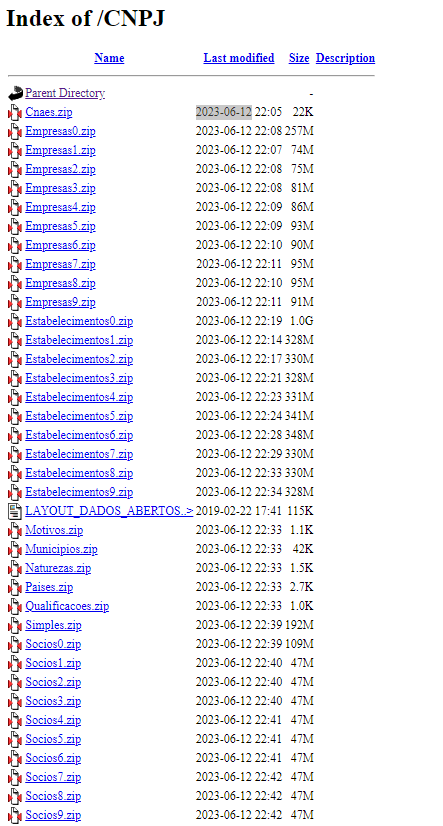

## **Link para Arquivos Unificados em CSV, após download e extração:**

* **Sócios** - https://drive.google.com/file/d/1tU7BM7ERQMD3ioYyVT1mzYhoBMGhkj_T
* **Empresas** - https://drive.google.com/file/d/1zBv_MULZQKJz_kEwf7z53p1apg3Z695m

In [8]:
sociofile_url = 'https://drive.google.com/file/d/1tU7BM7ERQMD3ioYyVT1mzYhoBMGhkj_T'
id = sociofile_url.split('d/')[1]

sociofile = drive.CreateFile({'id':id})
sociofile.GetContentFile('socios_final.csv')
!ls -lh

total 2.2G
drwxr-xr-x 1 root root 4.0K Jul 11 13:35 sample_data
-rw-r--r-- 1 root root 2.2G Jul 12 22:53 socios_final.csv


In [9]:
empresafile_url = 'https://drive.google.com/file/d/1zBv_MULZQKJz_kEwf7z53p1apg3Z695m'
id = empresafile_url.split('d/')[1]

empresafile = drive.CreateFile({'id':id})
empresafile.GetContentFile('empresas_final.csv')
!ls -lh

total 6.1G
-rw-r--r-- 1 root root 4.0G Jul 12 22:55 empresas_final.csv
drwxr-xr-x 1 root root 4.0K Jul 11 13:35 sample_data
-rw-r--r-- 1 root root 2.2G Jul 12 22:53 socios_final.csv


In [10]:
!ls -lh /content/

total 6.1G
-rw-r--r-- 1 root root 4.0G Jul 12 22:55 empresas_final.csv
drwxr-xr-x 1 root root 4.0K Jul 11 13:35 sample_data
-rw-r--r-- 1 root root 2.2G Jul 12 22:53 socios_final.csv


In [26]:
# Download dos arquivos de Sanções para Empresas
!wget --quiet --show-progress https://portaldatransparencia.gov.br/download-de-dados/cnep/$(date +"%Y%m%d").zip -O $(date +"%Y%m%d")_cnep.zip
!wget --quiet --show-progress https://portaldatransparencia.gov.br/download-de-dados/ceis/$(date +"%Y%m%d").zip -O $(date +"%Y%m%d")_ceis.zip

!unzip -o $(date +"%Y%m%d")_cnep.zip
!unzip -o $(date +"%Y%m%d")_ceis.zip

!rm -f $(date +"%Y%m%d")_cnep.zip
!rm -f $(date +"%Y%m%d")_ceis.zip

#O arquivo está disponível no diretório “/content/”. Agora, vamos ler esses arquivos *.csv para dentro do Spark:

20230712_cnep.zip   100%[===================>]  61.04K   100KB/s    in 0.6s    
20230712_ceis.zip   100%[===================>]   1.86M   369KB/s    in 6.0s    
Archive:  20230712_cnep.zip
  inflating: 20230712_CNEP.csv       
Archive:  20230712_ceis.zip
  inflating: 20230712_CEIS.csv       


In [12]:
#Instalar as dependências

#Instalar Java 8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

#Realizar o download do Spark
!wget -q https://dlcdn.apache.org/spark/spark-3.4.0/spark-3.4.0-bin-hadoop3.tgz

# Descompartar o arquivo baixado
!tar xf spark-3.4.0-bin-hadoop3.tgz

# Removendo o arquivo baixado em compressão
!rm -f spark-3.4.0-bin-hadoop3.tgz

#Instalando a findspark
!pip install -q findspark

A próxima etapa é configurar as variáveis de ambiente, pois isso habilita o ambiente do Colab a identificar corretamente onde as dependências estão rodando.

Para conseguir “manipular” o terminal e interagir como ele, você pode usar a biblioteca os.

In [13]:
#Configurar as variáveis de ambiente

#Importando a biblioteca os
import os
import pandas as pd

#Definindo a variável de ambiente do Java
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

#Definindo a variável de ambiente do Spark
os.environ["SPARK_HOME"] = "/content/spark-3.4.0-bin-hadoop3"

#Importando a findspark
import findspark

#Iniciando o findspark
findspark.init('spark-3.4.0-bin-hadoop3')

Com tudo pronto, vamos rodar uma sessão local para testar se a instalação funcionou corretamente.

In [14]:
# iniciar uma sessão local
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.functions import col
from pyspark.sql.types import StringType,BooleanType,DateType

import time
sc = SparkSession.builder.master('local[*]').config('spark.ui.port', '4050').getOrCreate()

In [15]:
#Executando apenas a variável sc em uma célula veremos algumas informações sobre a sessão Spark criada.
sc

Importado dados de exemplo

In [16]:
# Carregar dados do Conjunto de Empresas
df_spark = sc.read.option("delimiter", ";").csv("/content/empresas_final.csv", inferSchema=False, header=True)
cols = ("PORTE DA EMPRESA", "QUALIFICACAO DO RESPONSAVEL", "ENTE FEDERATIVO RESPONSAVEL")
df_spark = df_spark.drop(*cols)
df_spark = df_spark.withColumn("CNPJ", col("CNPJ").cast(StringType()))
df_spark.show(truncate=False)

+--------+--------------------------------------------------------+-----------------+-------------------------+
|CNPJ    |RAZAO SOCIAL                                            |NATUREZA JURIDICA|CAPITAL SOCIAL DA EMPRESA|
+--------+--------------------------------------------------------+-----------------+-------------------------+
|41273597|PACHARRUS QUEIROZ DA COSTA E SILVA 03618384335          |2135             |5000,00                  |
|41273598|GLORIA VIANA DIAS DA SILVA 13118961716                  |2135             |1100,00                  |
|41273599|ANA PAULA DA SILVA DE PAULA 04659802957                 |2135             |2000,00                  |
|41273600|41.273.600 AVANILSON BRUNO MATIAS DA SILVA              |2135             |50000,00                 |
|41273601|GABRIELA HELENA FACINI DA SILVA 47022415838             |2135             |2000,00                  |
|41273602|FABIO SOUZA DO ROSARIO 80392440210                      |2135             |15000,00           

In [57]:
df_spark.count()

53974344

In [17]:
# Verificando o schema() deste sparkdataframe
df_spark.printSchema()

root
 |-- CNPJ: string (nullable = true)
 |-- RAZAO SOCIAL: string (nullable = true)
 |-- NATUREZA JURIDICA: string (nullable = true)
 |-- CAPITAL SOCIAL DA EMPRESA: string (nullable = true)



In [18]:
# Carregar dados do Conjunto de Socios
df_spark_socio = sc.read.option("delimiter", ";").csv("/content/socios_final.csv", inferSchema=False, header=True)
cols = ("PAIS", "IDENTIFICADOR DE SOCIO", "REPRESENTANTE LEGAL", "DATA DE ENTRADA", "NOME DO REPRESENTANTE", "QUALIFICAÇÃO DO REPRESENTANTE LEGAL")
df_spark_socio = df_spark_socio.drop(*cols)
df_spark_socio = df_spark_socio.withColumn("CNPJ", col("CNPJ").cast(StringType()))
df_spark_socio.show(truncate=False)

+--------+-------------------------------------+-----------+---------------------+------------+
|CNPJ    |NOME SOCIO                           |CNPJ/CPF   |QUALIFICACAO DO SOCIO|FAIXA ETÁRIA|
+--------+-------------------------------------+-----------+---------------------+------------+
|46204351|RUTHIELLI DOS SANTOS ORTIZ           |***627370**|49                   |3           |
|46204403|LUIZ FELIPE FRANCA AMADIO            |***446578**|49                   |4           |
|46204403|BRUNO DESIDERA RAPOSO                |***528398**|49                   |4           |
|46204413|ANSELMO RICARDO DA SILVA             |***226797**|49                   |5           |
|46204456|LAIS ROCHA ROBERTI                   |***570166**|49                   |3           |
|46204480|GIACOMO RAUPP ZANINI                 |***226980**|49                   |4           |
|46204480|RAFAELA FAVERO BANDEIRA              |***445880**|49                   |4           |
|46204513|CARLOS FERNANDO DE CARLE RAMOS

In [56]:
df_spark_socio.count()

22869230

In [19]:
# Verificando o schema() deste sparkdataframe
df_spark_socio.printSchema()

root
 |-- CNPJ: string (nullable = true)
 |-- NOME SOCIO: string (nullable = true)
 |-- CNPJ/CPF: string (nullable = true)
 |-- QUALIFICACAO DO SOCIO: string (nullable = true)
 |-- FAIXA ETÁRIA: string (nullable = true)



# **Sanções do CEIS**

In [54]:
# Carregar dados do arquivo de Sancoes CEIS
from datetime import date
today = date.today().strftime("%Y%m%d")

file_ceis = today+"_CEIS.csv"
df_ceis = pd.read_csv(file_ceis, sep=';', encoding='latin',
                      converters={"CPF OU CNPJ DO SANCIONADO": str})

df_ceis.query("`TIPO DE PESSOA` == 'J'", inplace=True)
df_ceis.head()

,CADASTRO,CÓDIGO DA SANÇÃO,TIPO DE PESSOA,CPF OU CNPJ DO SANCIONADO,NOME DO SANCIONADO,NOME INFORMADO PELO ÓRGÃO SANCIONADOR,RAZÃO SOCIAL - CADASTRO RECEITA,NOME FANTASIA - CADASTRO RECEITA,NÚMERO DO PROCESSO,CATEGORIA DA SANÇÃO,DATA INÍCIO SANÇÃO,DATA FINAL SANÇÃO,DATA PUBLICAÇÃO,PUBLICAÇÃO,DETALHAMENTO,DATA DO TRÂNSITO EM JULGADO,ABRAGÊNCIA DEFINIDA EM DECISÃO JUDICIAL,ÓRGÃO SANCIONADOR,UF ÓRGÃO SANCIONADOR,FUNDAMENTAÇÃO LEGAL
2,CEIS,280671,J,41297212000160,APHA ELETROMÓVEIS EIRELI,APHA ELETROMÓVEIS EIRELI,ALPHA ELETROMOVEIS LTDA,NaN,07/002.748/2022,Suspensão,03/02/2023,02/02/2025,09/02/2023,Diário Oficial do Município Seção 221 Pagina 81,NaN,03/02/2023,Na Esfera e no Poder do órgão sancionador,Prefeitura Municipal da Cidade do Rio de Janei...,NaN,"LEI 8666 - ART. 87, III - PELA INEXECUÇÃO TOTA..."
5,CEIS,138088,J,22517836000109,J & J CONSTRUÇÕES LOCAÇÕES E SERVIÇOS EIRELI ME,J & J CONSTRUÇÕES LOCAÇÕES E SERVIÇOS EIRELI ME,J & J CONSTRUCOES LOCACOES E SERVICOS ME LTDA,J & J CONSTRUCOES,PROTOCOLO GED - 6012/2022,Suspensão,01/07/2022,01/07/2024,01/07/2022,Diário Oficial do Estado Seção LICITAÇÕES Pagi...,NaN,NaN,No órgão sancionador,Prefeitura Municipal de Venda Nova do Imigrant...,ES,"LEI 8666 - ART. 87, III - PELA INEXECUÇÃO TOTA..."
7,CEIS,121427,J,09458224000116,J. MACHADO DE ARAÚJO - ME,J. MACHADO DE ARAÚJO - ME,J MACHADO DE ARAUJO,*****,00083224520108260297,Impedimento/proibição de contratar com prazo d...,20/10/2020,20/10/2025,NaN,Sem Informação,NaN,20/10/2020,Sem Informação,Tribunal de Justiça do Estado de São Paulo / 1...,SP,LEI 8429 - ART. 12 - INDEPENDENTEMENTE DAS SAN...
8,CEIS,128713,J,03782198000109,DROGARIA MALONI LTDA.,DROGARIA MALONI LTDA.,ALESSANDRO MARCELINO EVANGELISTA,NaN,1000889-06.2016.8.26.0412,Impedimento/proibição de contratar com prazo d...,09/07/2020,08/07/2025,09/07/2020,Outro,Diário Oficial do Estado,09/07/2020,Sem Informação,PROCURADORIA GERAL DO ESTADO,SP,LEI 8429 - ART. 12 - INDEPENDENTEMENTE DAS SAN...
10,CEIS,139429,J,07249266000111,BRUNO ROGERIO BERTUOLO ME,BRUNO ROGERIO BERTUOLO ME,BRUNO ROGERIO BERTUOLO,EMOTIONS FORMATURAS E EVENTOS,40030058320138260073,Impedimento/proibição de contratar com prazo d...,10/03/2021,10/03/2026,NaN,Sem Informação,NaN,10/03/2021,Sem Informação,Tribunal de Justiça do Estado de São Paulo / 1...,SP,LEI 8429 - ART. 12 - INDEPENDENTEMENTE DAS SAN...


In [30]:
# Remover colunas não utilizadas
drop_columns = ['CÓDIGO DA SANÇÃO', 'NOME DO SANCIONADO','NOME INFORMADO PELO ÓRGÃO SANCIONADOR', 'NOME FANTASIA - CADASTRO RECEITA',
                'NÚMERO DO PROCESSO','DATA INÍCIO SANÇÃO', 'DATA FINAL SANÇÃO',	'DATA PUBLICAÇÃO',	'PUBLICAÇÃO', 'DETALHAMENTO',
                'DATA DO TRÂNSITO EM JULGADO','ABRAGÊNCIA DEFINIDA EM DECISÃO JUDICIAL', 'ÓRGÃO SANCIONADOR', 'FUNDAMENTAÇÃO LEGAL']
df_ceis.drop(columns=drop_columns, inplace=True)

In [31]:
df_ceis['CNPJBASE'] = df_ceis['CPF OU CNPJ DO SANCIONADO'].astype(str).str.slice(0, 8)
df_ceis.head()

,CADASTRO,TIPO DE PESSOA,CPF OU CNPJ DO SANCIONADO,RAZÃO SOCIAL - CADASTRO RECEITA,CATEGORIA DA SANÇÃO,UF ÓRGÃO SANCIONADOR,CNPJBASE
2,CEIS,J,41297212000160,ALPHA ELETROMOVEIS LTDA,Suspensão,NaN,41297212
5,CEIS,J,22517836000109,J & J CONSTRUCOES LOCACOES E SERVICOS ME LTDA,Suspensão,ES,22517836
7,CEIS,J,09458224000116,J MACHADO DE ARAUJO,Impedimento/proibição de contratar com prazo d...,SP,09458224
8,CEIS,J,03782198000109,ALESSANDRO MARCELINO EVANGELISTA,Impedimento/proibição de contratar com prazo d...,SP,03782198
10,CEIS,J,07249266000111,BRUNO ROGERIO BERTUOLO,Impedimento/proibição de contratar com prazo d...,SP,07249266


# **Sanções do CNEP**

In [55]:
# Carregar dados do arquivo de Sancoes CNEP
file_cnep = today+"_CNEP.csv"
df_cnep = pd.read_csv(file_cnep, sep=';', encoding='latin',
                      converters={"CPF OU CNPJ DO SANCIONADO": str})

df_cnep.query("`TIPO DE PESSOA` == 'J'", inplace=True)
df_cnep.head()

,CADASTRO,CÓDIGO DA SANÇÃO,TIPO DE PESSOA,CPF OU CNPJ DO SANCIONADO,NOME DO SANCIONADO,NOME INFORMADO PELO ÓRGÃO SANCIONADOR,RAZÃO SOCIAL - CADASTRO RECEITA,NOME FANTASIA - CADASTRO RECEITA,NÚMERO DO PROCESSO,CATEGORIA DA SANÇÃO,...,DATA INÍCIO SANÇÃO,DATA FINAL SANÇÃO,DATA PUBLICAÇÃO,PUBLICAÇÃO,DETALHAMENTO,DATA DO TRÂNSITO EM JULGADO,ABRAGÊNCIA DEFINIDA EM DECISÃO JUDICIAL,ÓRGÃO SANCIONADOR,UF ÓRGÃO SANCIONADOR,FUNDAMENTAÇÃO LEGAL
0,CNEP,118484,J,10375666000188,GLOBAL GESTAO EM SAUDE S.A.,GLOBAL GESTAO EM SAUDE S.A.,GLOBAL GESTAO EM SAUDE S.A.,NaN,005040692019,Publicação extraordinária da decisão condenatória,...,05/02/2021,NaN,05/02/2021,Diário Oficial da União Seção 3 Pagina 112,DOU - Aviso de penalidade,NaN,Sem Informação,Petróleo Brasileiro S.A.,NaN,"LEI 12846 - ART. 6º, §5º, II - A PUBLICAÇÃO EX..."
1,CNEP,282871,J,04750630000134,MASTER PROJETOS E EMPREENDIMENTOS CULTURAIS LTDA,MASTER PROJETOS E EMPREENDIMENTOS CULTURAIS LTDA,MASTER PROJETOS E EMPREENDIMENTOS CULTURAIS LTDA,MASTER PROJETOS CULTURAIS,00190106298201999,Publicação extraordinária da decisão condenatória,...,10/03/2023,NaN,10/02/2023,Diário Oficial da União Seção 1 Pagina 161,NaN,NaN,Na Esfera e no Poder do órgão sancionador,Controladoria-Geral da União,NaN,"LEI 12846 - ART. 6º, §5º, II - A PUBLICAÇÃO EX..."
2,CNEP,278554,J,32847777000182,FIRSTOIL PRATICA OFFSHORE S/A,FIRSTOIL PRATICA OFFSHORE S/A,FIRSTOIL OFFSHORE S/A,NaN,012009762022,Publicação extraordinária da decisão condenatória,...,02/12/2022,NaN,02/12/2022,Diário Oficial da União Seção 3 Pagina 290,NaN,NaN,Na Esfera e no Poder do órgão sancionador,Petróleo Brasileiro S.A.,NaN,"LEI 12846 - ART. 6º, §5º, II - A PUBLICAÇÃO EX..."
3,CNEP,129703,J,09266128000257,SOS GAS LTDA - ME,SOS GAS LTDA - ME,SOS GAS LTDA,SOS GAS,53112.000389/2017-49,Multa,...,11/10/2018,NaN,10/09/2018,Diário Oficial da União Seção 01 Pagina 19,Diário Oficial da União,10/09/2018,Na Esfera e no Poder do órgão sancionador,EMPRESA BRASILEIRA DE CORREIOS E TELÉGRAFOS,NaN,"LEI 12846 - ART. 6º, I - MULTA, NO VALOR DE 0,..."
4,CNEP,278226,J,20739738000182,DJO SERVICOS DE TRANSPORTES DE CARGAS EIRELI,DJO SERVICOS DE TRANSPORTES DE CARGAS EIRELI,DJO SERVICOS DE TRANSPORTES DE CARGAS EIRELI,MERARE EXPRESS,53123059437202081,Multa,...,16/12/2022,NaN,05/12/2022,Diário Oficial da União Seção 3 Pagina 19,NaN,16/12/2022,No órgão sancionador,EMPRESA BRASILEIRA DE CORREIOS E TELÉGRAFOS,NaN,"LEI 12846 - ART. 6º, I - MULTA, NO VALOR DE 0,..."


# **Remover colunas não utilizadas**

In [33]:
df_cnep.drop(columns=drop_columns, inplace=True)
df_cnep['CNPJBASE'] = df_cnep['CPF OU CNPJ DO SANCIONADO'].astype(str).str.slice(0, 8)
df_cnep.head()

,CADASTRO,TIPO DE PESSOA,CPF OU CNPJ DO SANCIONADO,RAZÃO SOCIAL - CADASTRO RECEITA,CATEGORIA DA SANÇÃO,VALOR DA MULTA,UF ÓRGÃO SANCIONADOR,CNPJBASE
0,CNEP,J,10375666000188,GLOBAL GESTAO EM SAUDE S.A.,Publicação extraordinária da decisão condenatória,NaN,NaN,10375666
1,CNEP,J,04750630000134,MASTER PROJETOS E EMPREENDIMENTOS CULTURAIS LTDA,Publicação extraordinária da decisão condenatória,NaN,NaN,04750630
2,CNEP,J,32847777000182,FIRSTOIL OFFSHORE S/A,Publicação extraordinária da decisão condenatória,NaN,NaN,32847777
3,CNEP,J,09266128000257,SOS GAS LTDA,Multa,"37227,67",NaN,09266128
4,CNEP,J,20739738000182,DJO SERVICOS DE TRANSPORTES DE CARGAS EIRELI,Multa,"46621,25",NaN,20739738


# **Concatenando os Dataframes**

In [34]:
df_cnep_ceis = pd.concat([df_cnep, df_ceis])
df_cnep_ceis

,CADASTRO,TIPO DE PESSOA,CPF OU CNPJ DO SANCIONADO,RAZÃO SOCIAL - CADASTRO RECEITA,CATEGORIA DA SANÇÃO,VALOR DA MULTA,UF ÓRGÃO SANCIONADOR,CNPJBASE
0,CNEP,J,10375666000188,GLOBAL GESTAO EM SAUDE S.A.,Publicação extraordinária da decisão condenatória,NaN,NaN,10375666
1,CNEP,J,04750630000134,MASTER PROJETOS E EMPREENDIMENTOS CULTURAIS LTDA,Publicação extraordinária da decisão condenatória,NaN,NaN,04750630
2,CNEP,J,32847777000182,FIRSTOIL OFFSHORE S/A,Publicação extraordinária da decisão condenatória,NaN,NaN,32847777
3,CNEP,J,09266128000257,SOS GAS LTDA,Multa,"37227,67",NaN,09266128
4,CNEP,J,20739738000182,DJO SERVICOS DE TRANSPORTES DE CARGAS EIRELI,Multa,"46621,25",NaN,20739738
...,...,...,...,...,...,...,...,...
14843,CEIS,J,11014790000180,INDUSTRIA E COMERCIO DE CAFES ESPECIAIS TERRA ...,Suspensão,NaN,NaN,11014790
14844,CEIS,J,41051476000139,MAYRA JUNG BRANDT,Declaração de Inidoneidade com prazo determinado,NaN,NaN,41051476
14847,CEIS,J,05807475000108,SEGINFO COMERCIO & SERVICOS EMPRESARIAIS LTDA,Suspensão,NaN,SC,05807475
14850,CEIS,J,03766197000162,ELGIN COMERCIO E SERVICOS LTDA,Declaração de Inidoneidade com prazo determinado,NaN,BA,03766197


In [35]:
# Remove CPF/CNPJ duplicados
df_cnep_ceis.drop_duplicates(subset=['CPF OU CNPJ DO SANCIONADO'], keep='first', inplace=True)
# Atualiza o índice do Dataframe
df_cnep_ceis.reset_index(drop=True, inplace=True)
df_cnep_ceis

,CADASTRO,TIPO DE PESSOA,CPF OU CNPJ DO SANCIONADO,RAZÃO SOCIAL - CADASTRO RECEITA,CATEGORIA DA SANÇÃO,VALOR DA MULTA,UF ÓRGÃO SANCIONADOR,CNPJBASE
0,CNEP,J,10375666000188,GLOBAL GESTAO EM SAUDE S.A.,Publicação extraordinária da decisão condenatória,NaN,NaN,10375666
1,CNEP,J,04750630000134,MASTER PROJETOS E EMPREENDIMENTOS CULTURAIS LTDA,Publicação extraordinária da decisão condenatória,NaN,NaN,04750630
2,CNEP,J,32847777000182,FIRSTOIL OFFSHORE S/A,Publicação extraordinária da decisão condenatória,NaN,NaN,32847777
3,CNEP,J,09266128000257,SOS GAS LTDA,Multa,"37227,67",NaN,09266128
4,CNEP,J,20739738000182,DJO SERVICOS DE TRANSPORTES DE CARGAS EIRELI,Multa,"46621,25",NaN,20739738
...,...,...,...,...,...,...,...,...
5931,CEIS,J,01772798000152,MEDTRONIC COMERCIAL LTDA,Suspensão,NaN,DF,01772798
5932,CEIS,J,07128103000180,M A FREITAS CONSTRUTORA LTDA,Impedimento/proibição de contratar com prazo d...,NaN,SP,07128103
5933,CEIS,J,11014790000180,INDUSTRIA E COMERCIO DE CAFES ESPECIAIS TERRA ...,Suspensão,NaN,NaN,11014790
5934,CEIS,J,41051476000139,MAYRA JUNG BRANDT,Declaração de Inidoneidade com prazo determinado,NaN,NaN,41051476


In [36]:
df_cnep_ceis['CNPJBASE'] = df_cnep_ceis['CPF OU CNPJ DO SANCIONADO'].astype(str).str.slice(0, 8)
df_rel_cnep_ceis = df_cnep_ceis[["CNPJBASE","CPF OU CNPJ DO SANCIONADO"]]
df_rel_cnep_ceis

,CNPJBASE,CPF OU CNPJ DO SANCIONADO
0,10375666,10375666000188
1,04750630,04750630000134
2,32847777,32847777000182
3,09266128,09266128000257
4,20739738,20739738000182
...,...,...
5931,01772798,01772798000152
5932,07128103,07128103000180
5933,11014790,11014790000180
5934,41051476,41051476000139


In [37]:
df_cnep_ceis.columns

Index(['CADASTRO', 'TIPO DE PESSOA', 'CPF OU CNPJ DO SANCIONADO',
       'RAZÃO SOCIAL - CADASTRO RECEITA', 'CATEGORIA DA SANÇÃO',
       'VALOR DA MULTA', 'UF ÓRGÃO SANCIONADOR', 'CNPJBASE'],
      dtype='object')

In [38]:
df_cnep_ceis.to_csv("cnep_ceis_unique.csv", sep=";", encoding="utf-8")
df_rel_cnep_ceis.to_csv("rel_cnep_ceis.csv", sep=";", encoding="utf-8")

In [39]:
# df_spark_ceis = sc.read.option("delimiter", ";").csv("/content/20230707_CEIS.csv", inferSchema=False, header=True)
# df_spark_ceis.show()

In [40]:
# Create PySpark DataFrame from Pandas
df_spark_sancoes=sc.createDataFrame(df_cnep_ceis)
df_spark_sancoes = df_spark_sancoes.withColumn("CPF OU CNPJ DO SANCIONADO",
                                               col("CPF OU CNPJ DO SANCIONADO").cast(StringType())
                                               )
df_spark_sancoes.printSchema()
df_spark_sancoes.show()

root
 |-- CADASTRO: string (nullable = true)
 |-- TIPO DE PESSOA: string (nullable = true)
 |-- CPF OU CNPJ DO SANCIONADO: string (nullable = true)
 |-- RAZÃO SOCIAL - CADASTRO RECEITA: string (nullable = true)
 |-- CATEGORIA DA SANÇÃO: string (nullable = true)
 |-- VALOR DA MULTA: string (nullable = true)
 |-- UF ÓRGÃO SANCIONADOR: string (nullable = true)
 |-- CNPJBASE: string (nullable = true)

+--------+--------------+-------------------------+-------------------------------+--------------------+--------------+--------------------+--------+
|CADASTRO|TIPO DE PESSOA|CPF OU CNPJ DO SANCIONADO|RAZÃO SOCIAL - CADASTRO RECEITA| CATEGORIA DA SANÇÃO|VALOR DA MULTA|UF ÓRGÃO SANCIONADOR|CNPJBASE|
+--------+--------------+-------------------------+-------------------------------+--------------------+--------------+--------------------+--------+
|    CNEP|             J|           10375666000188|           GLOBAL GESTAO EM ...|Publicação extrao...|           NaN|                 NaN|10375666|

# **Fazendo junção dos dados de Empresas e Sócios com as Sanções (CNEP e CEIS)**

In [41]:
# Cruzamento dos Dados de Empresas e Sanções
df_empresas_sancoes = df_spark.join(df_spark_sancoes,
                                  df_spark.CNPJ == df_spark_sancoes.CNPJBASE,
                                  "inner")

# Removendo columas consideradas desnecessárias
DROPCOL = ("NOME DO SANCIONADO","RAZÃO SOCIAL - CADASTRO RECEITA", "VALOR DA MULTA", "UF ÓRGÃO SANCIONADOR", "CNPJBASE")
df_empresas_sancoes = df_empresas_sancoes.drop(*DROPCOL)

df_empresas_sancoes.printSchema()
df_empresas_sancoes.show(truncate=False)

root
 |-- CNPJ: string (nullable = true)
 |-- RAZAO SOCIAL: string (nullable = true)
 |-- NATUREZA JURIDICA: string (nullable = true)
 |-- CAPITAL SOCIAL DA EMPRESA: string (nullable = true)
 |-- CADASTRO: string (nullable = true)
 |-- TIPO DE PESSOA: string (nullable = true)
 |-- CPF OU CNPJ DO SANCIONADO: string (nullable = true)
 |-- CATEGORIA DA SANÇÃO: string (nullable = true)

+--------+------------------------------------------+-----------------+-------------------------+--------+--------------+-------------------------+--------------------------------------------------------+
|CNPJ    |RAZAO SOCIAL                              |NATUREZA JURIDICA|CAPITAL SOCIAL DA EMPRESA|CADASTRO|TIPO DE PESSOA|CPF OU CNPJ DO SANCIONADO|CATEGORIA DA SANÇÃO                                     |
+--------+------------------------------------------+-----------------+-------------------------+--------+--------------+-------------------------+--------------------------------------------------------+

In [42]:
# Cruzamento dos Dados de Empresas e Sanções
df_socios_sancoes = df_spark_socio.join(df_spark_sancoes,
                                  df_spark_socio.CNPJ == df_spark_sancoes.CNPJBASE,
                                  "inner")

# Removendo columas consideradas desnecessárias
df_socios_sancoes = df_socios_sancoes.drop(*DROPCOL)

df_socios_sancoes.printSchema()
df_socios_sancoes.show(truncate=False)

root
 |-- CNPJ: string (nullable = true)
 |-- NOME SOCIO: string (nullable = true)
 |-- CNPJ/CPF: string (nullable = true)
 |-- QUALIFICACAO DO SOCIO: string (nullable = true)
 |-- FAIXA ETÁRIA: string (nullable = true)
 |-- CADASTRO: string (nullable = true)
 |-- TIPO DE PESSOA: string (nullable = true)
 |-- CPF OU CNPJ DO SANCIONADO: string (nullable = true)
 |-- CATEGORIA DA SANÇÃO: string (nullable = true)

+--------+---------------------------------------+--------------+---------------------+------------+--------+--------------+-------------------------+--------------------------------------------------------+
|CNPJ    |NOME SOCIO                             |CNPJ/CPF      |QUALIFICACAO DO SOCIO|FAIXA ETÁRIA|CADASTRO|TIPO DE PESSOA|CPF OU CNPJ DO SANCIONADO|CATEGORIA DA SANÇÃO                                     |
+--------+---------------------------------------+--------------+---------------------+------------+--------+--------------+-------------------------+-------------------

In [43]:
df_socios_sancoes.count()

8633

In [44]:
pdSocios_sancoes = df_socios_sancoes.toPandas()
pdSocios_sancoes.to_csv("socios_sancoes.csv", sep=";", encoding="utf-8")

In [45]:
df_empresas_sancoes.count()

5936

In [46]:
pdEmpresas_sancoes = df_empresas_sancoes.toPandas()
pdEmpresas_sancoes.to_csv("empresas_sancoes.csv", sep=";", encoding="utf-8")

# **Verificação de correlação entre os dados de Sócios com CEIS e CNEP**

In [47]:
from pyspark.sql.functions import lit

In [52]:
df_socios_sancoes = df_socios_sancoes.withColumn("QTD", lit(1))
# df_socios_sancoes = df_socios_sancoes.withColumn("QTDEMPRESAS", lit(df_socios_sancoes.groupBy('NOME SOCIO','CNPJ/CPF').sum('QTD')) )

df_socios_sancoes.groupBy('NOME SOCIO','CNPJ/CPF').sum('QTD').show(100)
# df_socios_sancoes.groupBy('NOME SOCIO','CNPJ/CPF').orderBy('QTDEMPRESAS').desc()

+--------------------+--------------+--------+
|          NOME SOCIO|      CNPJ/CPF|sum(QTD)|
+--------------------+--------------+--------+
|ALBERTO DE MORAES...|   ***122068**|       1|
|FABIO AURELIO SAN...|   ***537303**|       1|
|CELMA DE ALBUQUER...|   ***166114**|       1|
|SANDRO SOARES DE ...|   ***279177**|       1|
|MARIA CELIA LOREN...|   ***927018**|       1|
|MACILANO SILVA DE...|   ***557403**|       1|
|   ITAMAR DOS SANTOS|   ***675305**|       1|
|MB PARTICIPACOES S/A|39906398000165|       1|
|EDSON ROBERTO MUT...|   ***268439**|       1|
|LENIRA SILVA DE O...|   ***831164**|       2|
|TEREZA CHRISTINA ...|   ***940549**|       1|
|ALEXANDRE DOMINGU...|   ***862808**|       1|
|EDUARDO FARO BARR...|   ***166445**|       1|
|MILTON CESAR FERR...|   ***302077**|       4|
|WLADIMIR PEREIRA ...|   ***563627**|       1|
| JOSE DE PAULA SILVA|   ***608568**|       1|
|LUCIANE MARIA GUE...|   ***277730**|       1|
|PEDRO DE FARIAS F...|   ***022634**|       1|
|NILZA DOS RE

In [69]:
# Relação dos Sócios entre Empresas Sancionadas e Não Sancionadas
df_socio_relacionados = df_spark_socio.join(df_socios_sancoes, ["NOME SOCIO", "CNPJ/CPF"])

df_socio_relacionados.show(truncate=False)
df_socio_relacionados.printSchema()
df_socio_relacionados.count()

+---------------------------------------------+-----------+--------+---------------------+------------+--------+---------------------+------------+--------+--------------+-------------------------+--------------------------------------------------------+---+
|NOME SOCIO                                   |CNPJ/CPF   |CNPJ    |QUALIFICACAO DO SOCIO|FAIXA ETÁRIA|CNPJ    |QUALIFICACAO DO SOCIO|FAIXA ETÁRIA|CADASTRO|TIPO DE PESSOA|CPF OU CNPJ DO SANCIONADO|CATEGORIA DA SANÇÃO                                     |QTD|
+---------------------------------------------+-----------+--------+---------------------+------------+--------+---------------------+------------+--------+--------------+-------------------------+--------------------------------------------------------+---+
|DANIEL FERREIRA NAVARRO COELHO               |***547866**|46218505|49                   |3           |37448723|49                   |3           |CEIS    |J             |37448723000168           |Impedimento/proibição de c

31099

In [84]:
dfSocioRelacionados = df_socio_relacionados.toPandas()
dfSocioRelacionados.to_csv("socios_sancoes_total.csv", sep=";", encoding="utf-8")

In [81]:
drop_cols = ["CNPJ","QUALIFICACAO DO SOCIO","FAIXA ETÁRIA","CADASTRO","TIPO DE PESSOA","CPF OU CNPJ DO SANCIONADO","CATEGORIA DA SANÇÃO"]
df_unique_socio_relacionados = df_socio_relacionados.drop(*drop_cols)

df_unique_socio_relacionados = df_unique_socio_relacionados.dropDuplicates()
df_unique_socio_relacionados.show(truncate=False)
df_unique_socio_relacionados.printSchema()
df_unique_socio_relacionados.count()

+---------------------------------------------+--------------+---+
|NOME SOCIO                                   |CNPJ/CPF      |QTD|
+---------------------------------------------+--------------+---+
|DANIEL FERREIRA NAVARRO COELHO               |***547866**   |1  |
|RONAN LUCAS RODRIGUES                        |***113996**   |1  |
|ALBERTO DE MORAES LEITAO NETO                |***122068**   |1  |
|CARLOS ALBERTO DE SA                         |***955581**   |1  |
|JORGE DAVID RAMIREZ SCOTT                    |***004628**   |1  |
|DANIEL SANCHEZ VALLEJO JORDAO                |***625708**   |1  |
|VALENTIM VIOLA                               |***900848**   |1  |
|RUY OLIVEIRA DE SOUSA                        |***198395**   |1  |
|ANAEL DOS SANTOS LOPES                       |***254237**   |1  |
|PATRICIA BATISTA DE ABREU GRABNER            |***063015**   |1  |
|MARINA NOVA DA COSTA MENDES ANTONELLI SANTANA|***399241**   |1  |
|KARINE VIDALETTI DIPP                        |***797890**   |

8324

In [75]:
dfSocioRelacionados = df_unique_socio_relacionados.toPandas()
dfSocioRelacionados.to_csv("socios_sancoes_total.csv", sep=";", encoding="utf-8")

In [82]:
# Relação das Empresas com Sócios do Quadro Societário de Empresas Sancionadas
df_empresas_relacionadas = df_spark.join(df_socio_relacionados, ["CNPJ"])

df_empresas_relacionadas.show(truncate=False)
df_empresas_relacionadas.printSchema()
df_empresas_relacionadas.count()

+--------+---------------------------------------------------------------+-----------------+-------------------------+---------------------------------+-----------+---------------------+------------+--------+---------------------+------------+--------+--------------+-------------------------+--------------------------------------------------------+---+
|CNPJ    |RAZAO SOCIAL                                                   |NATUREZA JURIDICA|CAPITAL SOCIAL DA EMPRESA|NOME SOCIO                       |CNPJ/CPF   |QUALIFICACAO DO SOCIO|FAIXA ETÁRIA|CNPJ    |QUALIFICACAO DO SOCIO|FAIXA ETÁRIA|CADASTRO|TIPO DE PESSOA|CPF OU CNPJ DO SANCIONADO|CATEGORIA DA SANÇÃO                                     |QTD|
+--------+---------------------------------------------------------------+-----------------+-------------------------+---------------------------------+-----------+---------------------+------------+--------+---------------------+------------+--------+--------------+-----------------------

31099

In [85]:
# df_unique_empresas_relacionadas = df_empresas_relacionadas.distinct(["CNPJ","RAZAO SOCIAL","NATUREZA JURIDICA","CAPITAL SOCIAL DA EMPRESA"])

drop_cols = ["NOME SOCIO","CNPJ/CPF","QUALIFICACAO DO SOCIO","FAIXA ETÁRIA","CNPJ","QUALIFICACAO DO SOCIO","FAIXA ETÁRIA",\
             "CADASTRO","TIPO DE PESSOA","CPF OU CNPJ DO SANCIONADO","CATEGORIA DA SANÇÃO"]
df_unique_empresas_relacionadas = df_empresas_relacionadas.drop(*drop_cols)

+--------+-----------------------------------------------------------------------+-----------------+-------------------------+----------------------------------+-----------+---------------------+------------+--------+---------------------+------------+--------+--------------+-------------------------+--------------------------------------------------------+---+
|CNPJ    |RAZAO SOCIAL                                                           |NATUREZA JURIDICA|CAPITAL SOCIAL DA EMPRESA|NOME SOCIO                        |CNPJ/CPF   |QUALIFICACAO DO SOCIO|FAIXA ETÁRIA|CNPJ    |QUALIFICACAO DO SOCIO|FAIXA ETÁRIA|CADASTRO|TIPO DE PESSOA|CPF OU CNPJ DO SANCIONADO|CATEGORIA DA SANÇÃO                                     |QTD|
+--------+-----------------------------------------------------------------------+-----------------+-------------------------+----------------------------------+-----------+---------------------+------------+--------+---------------------+------------+--------+-----------

31099

In [86]:
df_unique_empresas_relacionadas = df_unique_empresas_relacionadas.dropDuplicates()

df_unique_empresas_relacionadas.show(truncate=False)
df_unique_empresas_relacionadas.printSchema()
df_unique_empresas_relacionadas.count()

+--------+-----------------------------------------------------------------------+-----------------+-------------------------+----------------------------------+-----------+---------------------+------------+--------+---------------------+------------+--------+--------------+-------------------------+--------------------------------------------------------+---+
|CNPJ    |RAZAO SOCIAL                                                           |NATUREZA JURIDICA|CAPITAL SOCIAL DA EMPRESA|NOME SOCIO                        |CNPJ/CPF   |QUALIFICACAO DO SOCIO|FAIXA ETÁRIA|CNPJ    |QUALIFICACAO DO SOCIO|FAIXA ETÁRIA|CADASTRO|TIPO DE PESSOA|CPF OU CNPJ DO SANCIONADO|CATEGORIA DA SANÇÃO                                     |QTD|
+--------+-----------------------------------------------------------------------+-----------------+-------------------------+----------------------------------+-----------+---------------------+------------+--------+---------------------+------------+--------+-----------

31099

In [87]:
dfEmpRelacionadas = df_unique_empresas_relacionadas.toPandas()
dfEmpRelacionadas.to_csv("empresas_sancoes_total.csv", sep=";", encoding="utf-8")